<a href="https://colab.research.google.com/github/danielavela0227/AI_Agu-Dec-2024_BI_2002444/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daniela Lizeth Vela Carrillo 2002444

Biomedical Engineering - AI

Class Time: Thursday N4N6

**Assignment 6. Artificial Neural Network: feedforward.** The student will train a Feedforward Neural Network model in Google Colab using the Python programming language. This model will use the MNIST dataset; this dataset contains low-resolution images with handwritten digits from 0 to 9. The dataset is part of the Keras library.

Step 1. Load libraries.

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

Step 2. Load data.

In [20]:
#MNIST dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

Step 3. Data preprocessing.

In [21]:
#Reshape and normalize the images
train_data = train_data.reshape((60000, 28 * 28)).astype('float32') / 255
test_data = test_data.reshape((10000, 28 * 28)).astype('float32') / 255

In [22]:
#One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Step 4. Model selection and training.

In [23]:
# Define the FNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the FNN model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Train the model
history = model.fit(train_data, train_labels, epochs=5, batch_size=512)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6576 - loss: 1.0565
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9032 - loss: 0.3342
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9256 - loss: 0.2611
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9406 - loss: 0.2062
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9495 - loss: 0.1783


Step 5. Model testing.

In [26]:
# Evaluate the model performance.
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1201
Test accuracy: 0.9690999984741211


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 6 Actual: 6


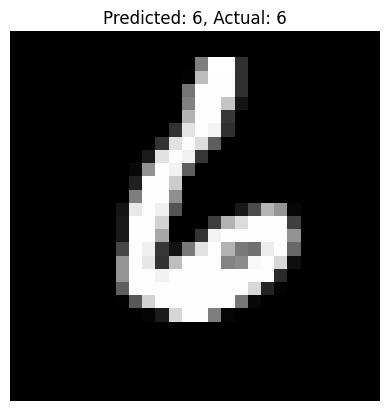

Prediction: 0 Actual: 0


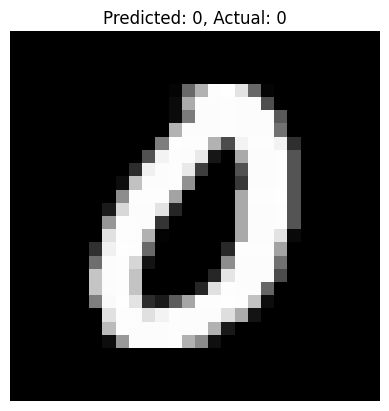

Prediction: 3 Actual: 3


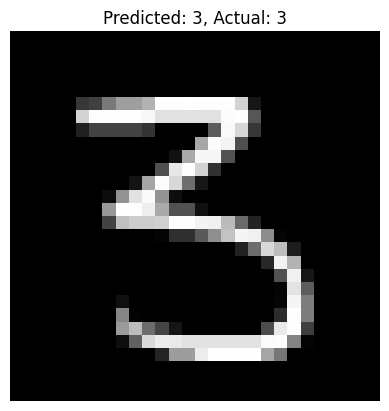

Prediction: 1 Actual: 1


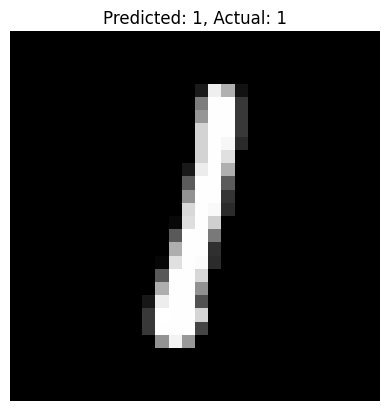

Prediction: 4 Actual: 4


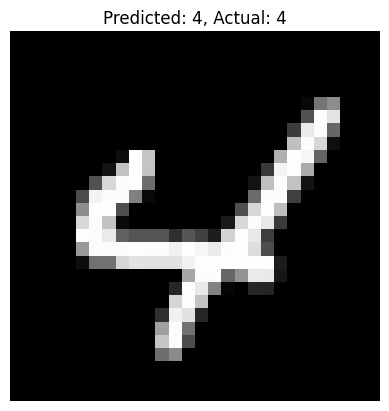

In [31]:
# Select five random indices from the test set
random_indices = np.random.choice(len(test_data), 5, replace=False)

# Perform predictions
predictions = model.predict(test_data[random_indices])
actual_labels = test_labels[random_indices]

for i in range(5):
    predicted_label = tf.argmax(predictions[i]).numpy()
    actual_label = tf.argmax(actual_labels[i]).numpy()
    print("Prediction:", predicted_label, "Actual:", actual_label)

    # Display the image
    plt.imshow(test_data[random_indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    plt.axis('off')
    plt.show()